Step 1: This file should be located in a directory which is in the same directory as zemax   
Step 2: Go to zemax, go to programming tab, zos-api.net..., python, interactive extension. This will create the zos connection file.      
Step 3: Click Interactive Extension

Below I show the setup before it has been optimised.

![image](pics/nooptimisedsetup.PNG)
![image](pics/nooptimiseddiagram.PNG)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *

import os 
import sys
import h5py
path = os.path.dirname(os.path.dirname(os.path.realpath("__file__")))


# sys.path.append(path)
sys.path.insert(0,path)
# zemax_path = path+"\Zemax\ZOS-API Projects\PythonZOSConnection\PythonZOSConnection.py" # work this out later


This initializes the connection.

In [4]:
%run -i "\\alfs1.physics.ox.ac.uk\al\howards\Zemax\ZOS-API Projects\PythonZOSConnection\PythonZOSConnection.py"

Found OpticStudio at:   %sc:\program files\zemax opticstudio
Connected to OpticStudio
Serial #:  L121911


First lets look at what the MTF of the system looks like before optimisation

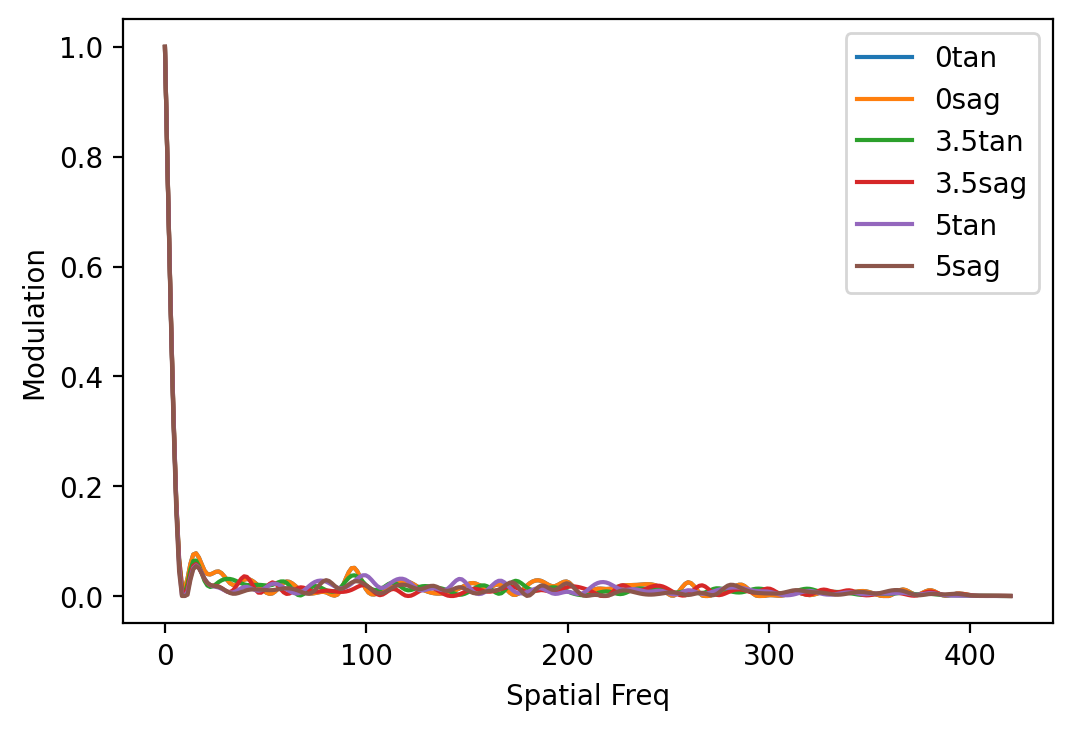

In [5]:
analyse_MTF(TheSystem,ZOSAPI,[0,3.5,5])

And now lets get ready to optimise...

In [17]:
LDE = TheSystem.LDE #Lens properties contained in LDE (Lens Data Editor).

print(LDE.NumberOfSurfaces) #surface 2 = front of lens, surface 3 = back of lens. 

lens_front = LDE.GetSurfaceAt(2)
lens_back = LDE.GetSurfaceAt(3) #I think index begins at 1

lens_front.RadiusCell.MakeSolveVariable()
lens_front.ThicknessCell.MakeSolveVariable()
lens_back.ThicknessCell.MakeSolveVariable() #optimise these parameters.


4


True

In [18]:
#make merit function...
MFE = TheSystem.MFE

Merit = MFE.GetOperandAt(1)
Merit.ChangeType(ZOSAPI.Editors.MFE.MeritOperandType.MTFN)
Merit.Target = 0.0
Merit.Weight = 1.0

print('Running Local Optimization')
LocalOpt = TheSystem.Tools.OpenLocalOptimization()
LocalOpt.Algorithm = ZOSAPI.Tools.Optimization.OptimizationAlgorithm.DampedLeastSquares
LocalOpt.Cycles = ZOSAPI.Tools.Optimization.OptimizationCycles.Automatic
LocalOpt.NumberOfCores = 8
LocalOpt.RunAndWaitForCompletion()
LocalOpt.Close()


Running Local Optimization


True

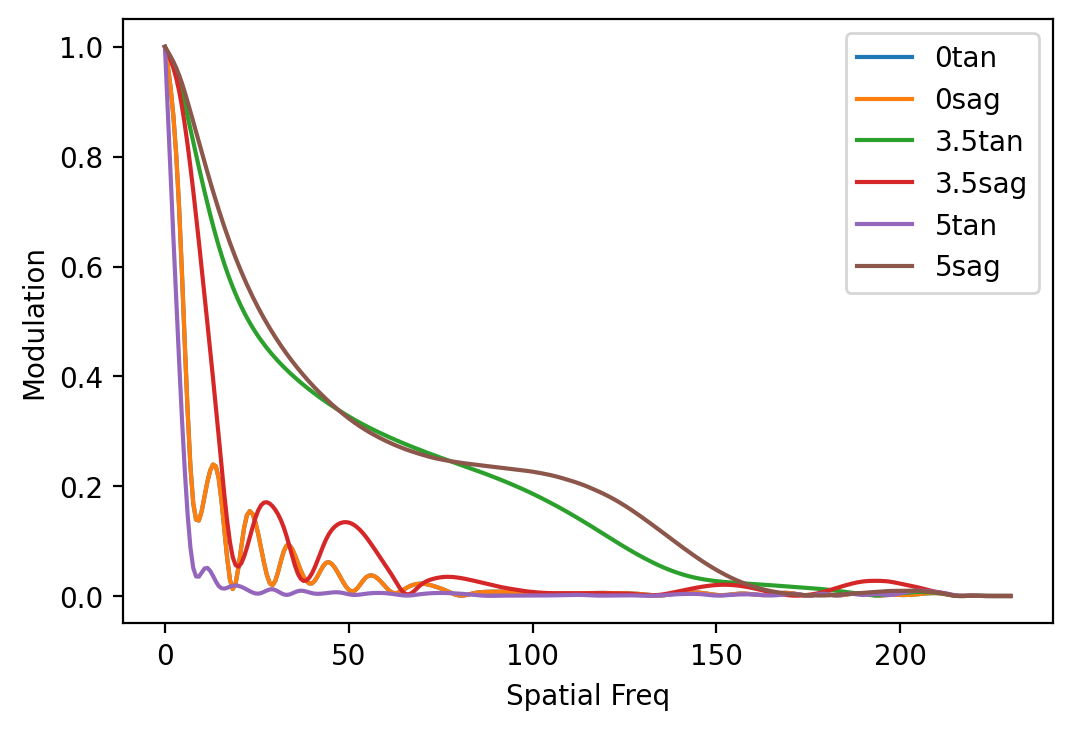

In [19]:
analyse_MTF(TheSystem,ZOSAPI,[0,3.5,5])